# Fourier spectra
    - Read temperature data
    - Apply FFT
    - Generate Power Density Spectrum
    - Inverse Transform

In [1]:
# First load necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
import pandas as pd

In [2]:
# Read temperature data
df = pd.read_excel('https://o2.eas.gatech.edu/data/ATL_MonMeanTemp.xls')
df.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1894,46.7,45.0,56.7,62.0,68.8,76.4,76.2,76.4,73.4,62.1,49.5,46.1
1,1895,40.3,34.4,51.6,60.4,67.0,76.8,77.0,77.1,76.5,59.8,52.4,43.5
2,1896,41.8,45.4,49.2,65.7,74.7,75.1,78.2,80.3,74.7,61.5,55.6,44.2
3,1897,38.8,47.7,54.9,59.8,67.9,78.7,78.4,76.1,74.4,66.1,53.2,45.3
4,1898,46.8,43.1,57.5,56.5,72.8,79.2,77.9,77.2,73.6,60.2,48.5,43.6


In [3]:
# extract data
year=df['Year'].to_numpy()
#
# number of data points = (# of year) x 12
N=np.size(year)*12
#
# count the number of months in data, and number of years
print(f'number of data points = {N}, i.e. {N/12} years')
time=year[0]+np.arange(0,N,1)/12

number of data points = 1524, i.e. 127.0 years


Text(0, 0.5, 'Atlanta monthly mean temp, deg F')

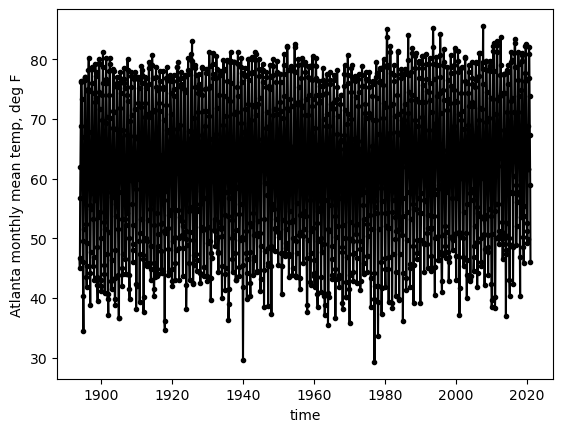

In [4]:
# Disploay the data 
alldata = df.to_numpy()
alltemp = alldata[:,1:].flatten()
plt.plot(time,alltemp,'k.-')
plt.xlabel('time')
plt.ylabel('Atlanta monthly mean temp, deg F')

In [5]:
# Apply FFT to the Atlanta temperature data
# first subtract the long term mean temperature
temp_ltm = np.mean(alltemp)
temp_anom= alltemp - temp_ltm
c = np.fft.fft(temp_anom)
#
Nc = np.size(c)
print(f'The number of Fourier coefficients from FFT is {Nc}')

The number of Fourier coefficients from FFT is 1524


In [6]:
# sampling frequency, dt, is 1 month
dt = 1
# T is the period of this data
T = N*dt # period in the units of months 
print(f'Period : T = {N} months')
#
# Nyquest frequency is 1/(2*dt) 

Period : T = 1524 months


/var/folders/s6/962q46653xd_fxwlc18l0t8w00bhjp/T/ipykernel_75065/646481001.py:2: RuntimeWarning: divide by zero encountered in divide
  per = 1/freq


Text(0.5, 0, 'indices of FFT coeffs')

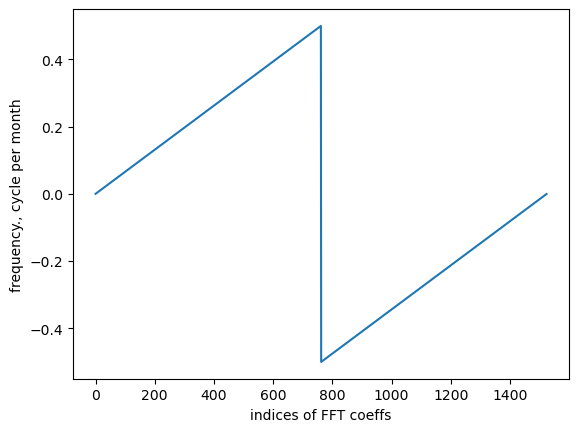

In [7]:
freq = np.fft.fftfreq(N,dt)
per = 1/freq
#
plt.plot(freq)
plt.ylabel('frequency., cycle per month')
plt.xlabel('indices of FFT coeffs')

Text(0.5, 0, 'frequency, cycle per month')

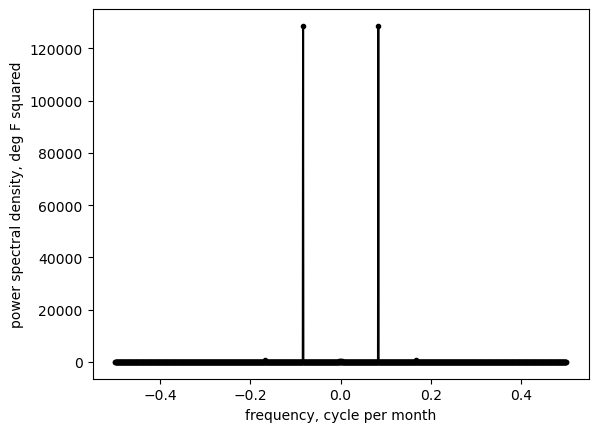

In [8]:
# display the power spectral density
plt.plot(freq,np.abs(c)**2/(N*dt),'k.-')
plt.ylabel('power spectral density, deg F squared')
plt.xlabel('frequency, cycle per month')

Text(0.5, 0, 'frequency, cycle per month')

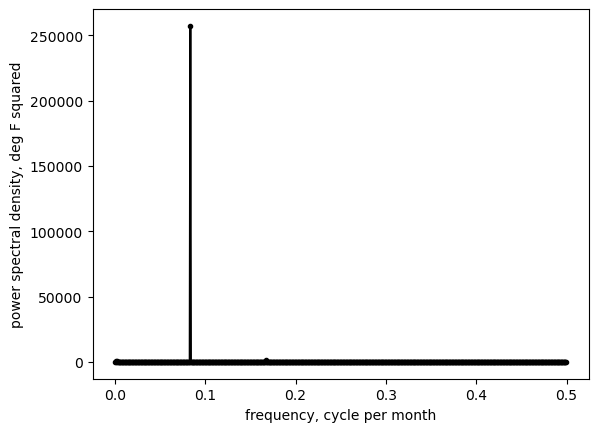

In [9]:
# Just taking the 1/2 of the data and multiply by 2
plt.plot(freq[:int(N/2)],2*np.abs(c[:int(N/2)])**2/(N*dt),'k.-')
plt.ylabel('power spectral density, deg F squared')
plt.xlabel('frequency, cycle per month')

In [10]:
# Inverse FFT to go back to real space
data_reconstructed = np.fft.ifft(c)

/Users/takamitsu3/opt/anaconda3/envs/easX305_2022/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'recon. Atlanta temp anomaly, deg F')

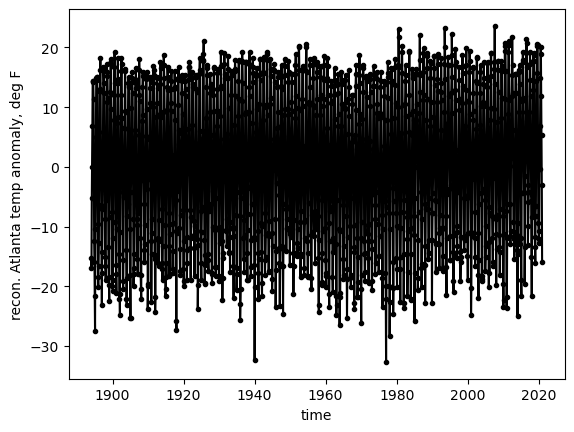

In [11]:
# display the result
plt.plot(time,data_reconstructed,'k.-')
plt.xlabel('time')
plt.ylabel('recon. Atlanta temp anomaly, deg F')

## Filter out seasonality
    - First, remove only frequency = 1/12

In [12]:
# Filter out seasonality, frequency = 1/12
seas = abs(freq)==1/12
# copy the Fourier coefficient
c_filt = c.copy()
# remove the seasonal cycle
c_filt[seas]=0

Text(0.5, 0, 'frequency, cycle per month')

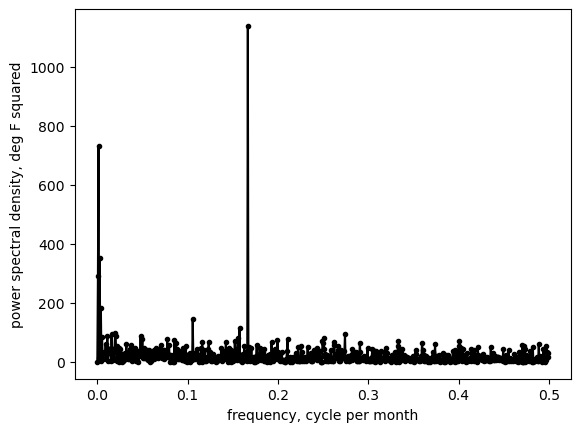

In [13]:
# Plot the power spectral density
plt.plot(freq[:int(N/2)],2*np.abs(c_filt[:int(N/2)])**2/(N*dt),'k.-')
plt.ylabel('power spectral density, deg F squared')
plt.xlabel('frequency, cycle per month')

In [14]:
# Inverse FFT to go back to real space
data_filt = np.fft.ifft(c_filt)

Text(0, 0.5, 'filtered Atlanta temp anomaly, deg F')

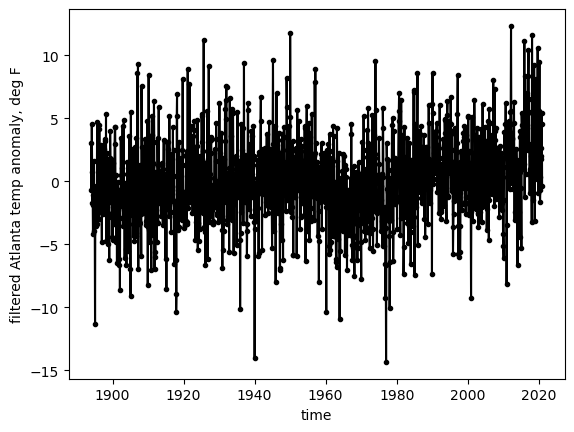

In [15]:
# display the result
plt.plot(time,data_filt,'k.-')
plt.xlabel('time')
plt.ylabel('filtered Atlanta temp anomaly, deg F')

## Filter out high-frequency variability
    - Retain low-frequency component only
    - Set cutoff frequency (2 year)
    - Remove all frequency > 1/(12*2)

In [16]:
# Apply filter 
seas = abs(freq)>=1/(12*5)
# copy the Fourier coefficient
c_filt = c.copy()
# remove the seasonal cycle
c_filt[seas]=0

Text(0.5, 0, 'frequency, cycle per month')

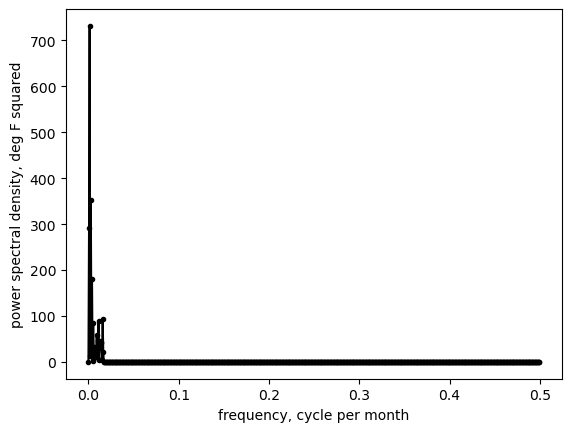

In [17]:
# Plot the power spectral density
plt.plot(freq[:int(N/2)],2*np.abs(c_filt[:int(N/2)])**2/(N*dt),'k.-')
plt.ylabel('power spectral density, deg F squared')
plt.xlabel('frequency, cycle per month')

In [18]:
# Inverse FFT to go back to real space
data_filt = np.fft.ifft(c_filt)

Text(0, 0.5, 'filtered Atlanta temp anomaly, deg F')

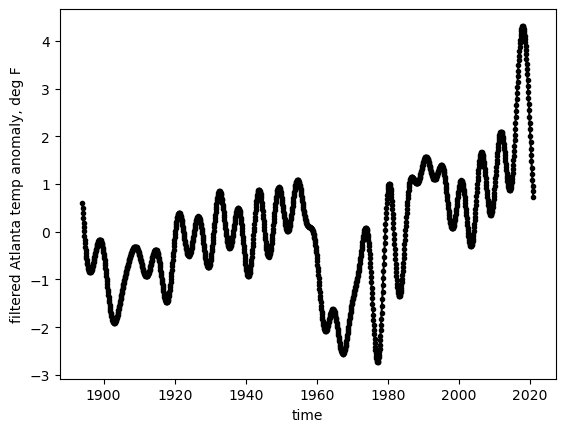

In [19]:
# display the result
plt.plot(time,data_filt,'k.-')
plt.xlabel('time')
plt.ylabel('filtered Atlanta temp anomaly, deg F')